1. Import and Load Dataset

In [5]:
#import panda
import pandas as pd

In [6]:
#upload dataset
from google.colab import files
file = files.upload()

Saving bbc-news-data.csv to bbc-news-data.csv


2. Data Exploration 

- show data

In [7]:
#preview dataset
df = pd.read_csv('bbc-news-data.csv',sep='\t')
df.head(10)

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
5,business,006.txt,Japan narrowly escapes recession,Japan's economy teetered on the brink of a te...
6,business,007.txt,Jobs growth still slow in the US,The US created fewer jobs than expected in Ja...
7,business,008.txt,India calls for fair trade rules,"India, which attends the G7 meeting of seven ..."
8,business,009.txt,Ethiopia's crop production up 24%,Ethiopia produced 14.27 million tonnes of cro...
9,business,010.txt,Court rejects $280bn tobacco case,A US government claim accusing the country's ...


- show column names

In [8]:
#data column
df.columns

Index(['category', 'filename', 'title', 'content'], dtype='object')

- delete unused column

In [9]:
#delete unused column
df_new = df.drop(columns=['filename'])
df_new

,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...
2220,tech,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,Be careful how you code,A new European directive could put software w...
2223,tech,US cyber security chief resigns,The man making sure US computer networks are ...


- show jumlah baris dan kolom dataset

In [10]:
#data sampel info
df.shape

(2225, 4)

3. Data Preprocessing

- import library
- NLTK (Natural Language Toolkit) is library that help us work with text processing. this library help us to process teks like classification, tokenization, steeming, tagging, etc 

In [11]:
# import and download package
import nltk, os, re, string

from keras.layers import Input, LSTM, Bidirectional, SpatialDropout1D, Dropout, Flatten, Dense, Embedding, BatchNormalization
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

- do text preprocessing 
  - make all word lowercase
  - remove functuation
  - lematization
  - removing number
  - removing stopword 

In [12]:
# lower-case all characters
df_new.title = df_new.title.apply(lambda x: x.lower())
df_new.content = df_new.content.apply(lambda x: x.lower())

# removing functuation
def cleaner(data):
    return(data.translate(str.maketrans('','', string.punctuation)))
    df_new.title = df_new.title.apply(lambda x: cleaner(x))
    df_new.content = df_new.content.apply(lambda x: lem(x))

## lematization
lemmatizer = WordNetLemmatizer()

def lem(data):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(data.split())]))
    df_new.title = df_new.title.apply(lambda x: lem(x))
    df_new.content = df_new.content.apply(lambda x: lem(x))

# removing number
def rem_numbers(data):
    return re.sub('[0-9]+','',data)
    df_new['title'].apply(rem_numbers)
    df_new['content'].apply(rem_numbers)

# removing stopword
st_words = stopwords.words()
def stopword(data):
    return(' '.join([w for w in data.split() if w not in st_words ]))
    df_new.title = df_new.title.apply(lambda x: stopword(x))
    df_new.content = df_new.content.apply(lambda x: lem(x))

- show text after preprocessing

In [13]:
# view data after cleansing
df_new.head(10)

,category,title,content
0,business,ad sales boost time warner profit,quarterly profits at us media giant timewarne...
1,business,dollar gains on greenspan speech,the dollar has hit its highest level against ...
2,business,yukos unit buyer faces loan claim,the owners of embattled russian oil giant yuk...
3,business,high fuel prices hit ba's profits,british airways has blamed high fuel prices f...
4,business,pernod takeover talk lifts domecq,shares in uk drinks and food firm allied dome...
5,business,japan narrowly escapes recession,japan's economy teetered on the brink of a te...
6,business,jobs growth still slow in the us,the us created fewer jobs than expected in ja...
7,business,india calls for fair trade rules,"india, which attends the g7 meeting of seven ..."
8,business,ethiopia's crop production up 24%,ethiopia produced 14.27 million tonnes of cro...
9,business,court rejects $280bn tobacco case,a us government claim accusing the country's ...


- change categorical values into numeric

In [14]:
# data category one-hot-encoding
category = pd.get_dummies(df_new.category)
df_new_cat = pd.concat([df_new, category], axis=1)
df_new_cat = df_new_cat.drop(columns='category')
df_new_cat.head(10)

,title,content,business,entertainment,politics,sport,tech
0,ad sales boost time warner profit,quarterly profits at us media giant timewarne...,1,0,0,0,0
1,dollar gains on greenspan speech,the dollar has hit its highest level against ...,1,0,0,0,0
2,yukos unit buyer faces loan claim,the owners of embattled russian oil giant yuk...,1,0,0,0,0
3,high fuel prices hit ba's profits,british airways has blamed high fuel prices f...,1,0,0,0,0
4,pernod takeover talk lifts domecq,shares in uk drinks and food firm allied dome...,1,0,0,0,0
5,japan narrowly escapes recession,japan's economy teetered on the brink of a te...,1,0,0,0,0
6,jobs growth still slow in the us,the us created fewer jobs than expected in ja...,1,0,0,0,0
7,india calls for fair trade rules,"india, which attends the g7 meeting of seven ...",1,0,0,0,0
8,ethiopia's crop production up 24%,ethiopia produced 14.27 million tonnes of cro...,1,0,0,0,0
9,court rejects $280bn tobacco case,a us government claim accusing the country's ...,1,0,0,0,0


-  seperate label and attribute
  - Untuk mempersingkat kode dan tidak perlu mendefinisikan seluruh jenis labelnya bisa menggunakan index seperti kode dibawah
 

In [15]:
# change dataframe value to numpy array
news = df_new_cat['title'].values + '' + df_new_cat['content'].values

# label = df_new_cat[['business', 'entertainment', 'politics', 'sport', 'tech']].values
label = df_new_cat.values[:, 1:].astype(float) 

In [16]:
# view news array
news

array(['ad sales boost time warner profit quarterly profits at us media giant timewarner jumped 76% to $1.13bn (£600m) for the three months to december, from $639m year-earlier.  the firm, which is now one of the biggest investors in google, benefited from sales of high-speed internet connections and higher advert sales. timewarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. its profits were buoyed by one-off gains which offset a profit dip at warner bros, and less users for aol.  time warner said on friday that it now owns 8% of search-engine google. but its own internet business, aol, had has mixed fortunes. it lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. however, the company said aol\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. it hopes to increase subscribers by offering the online service free to timewarner internet customers and will try to sig

In [17]:
# view label array
label

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]], dtype=uint8)

- split into dataset and datatraining

In [18]:
# Split data into training and validation
from sklearn.model_selection import train_test_split
news_train, news_test, label_train, label_test = train_test_split(news, label, test_size=0.2, shuffle=True)

4. Make model understand text

- tokenization
- sequences
- padding

- note

  - Sebenarnya secara default, fungsi Tokenizer telah memiliki nilai default argument filters yang sangat lengkap. Sehingga sebenarnya kamu tidak perlu mencantumkannya kembali
Referensi : [Dokumentasi Tokenizer TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)

  -  tokenizer.fit_on_texts sebaiknya hanya digunakan untuk train set saja
karena jika dilakukan untuk test set atau semua teks yang ada di dataset maka model akan sulit memprediksi teks yang wordnya tidak ada di dalam dataset. fit_on_texts pada train_set saja itu dapat menghindari peluang overfitting 
referensi : [link](https://stackoverflow.com/questions/54891464/is-it-better-to-keras-fit-to-text-on-the-entire-x-data-or-just-the-train-data)


In [19]:
# tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x', filters='!"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')
tokenizer.fit_on_texts(news_train) 

# tokenizer tidak usah datatest nanti overfitting
# tokenizer.fit_on_texts(news_test)
 
sekuens_train = tokenizer.texts_to_sequences(news_train)
sekuens_test = tokenizer.texts_to_sequences(news_test)
 
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

5. Building Model

In [17]:
# model
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy',)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 435,973
Trainable params: 435,973
Non-trainable params: 0
_________________________________________________________________


- using callback

In [18]:
# callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 90%!")
callbacks = myCallback()

6. Train Model

In [19]:
# model fit
history = model.fit(padded_train, label_train, epochs=50, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks], validation_steps=30)

Epoch 1/50
56/56 - 229s - loss: 1.5752 - accuracy: 0.2820 - val_loss: 1.3482 - val_accuracy: 0.4472 - 229s/epoch - 4s/step
Epoch 2/50
56/56 - 224s - loss: 1.1637 - accuracy: 0.4365 - val_loss: 1.0391 - val_accuracy: 0.4697 - 224s/epoch - 4s/step
Epoch 3/50
56/56 - 223s - loss: 0.9909 - accuracy: 0.5315 - val_loss: 0.8850 - val_accuracy: 0.5933 - 223s/epoch - 4s/step
Epoch 4/50
56/56 - 222s - loss: 0.6492 - accuracy: 0.7219 - val_loss: 0.8667 - val_accuracy: 0.5820 - 222s/epoch - 4s/step
Epoch 5/50
56/56 - 222s - loss: 0.3882 - accuracy: 0.8685 - val_loss: 0.6809 - val_accuracy: 0.7371 - 222s/epoch - 4s/step
Epoch 6/50
56/56 - 222s - loss: 0.1864 - accuracy: 0.9466 - val_loss: 0.4171 - val_accuracy: 0.8719 - 222s/epoch - 4s/step
Epoch 7/50
56/56 - 222s - loss: 0.1183 - accuracy: 0.9775 - val_loss: 0.5443 - val_accuracy: 0.8449 - 222s/epoch - 4s/step
Epoch 8/50
56/56 - 222s - loss: 0.1330 - accuracy: 0.9640 - val_loss: 0.5753 - val_accuracy: 0.8382 - 222s/epoch - 4s/step
Epoch 9/50
56/56

7. Evaluate Model

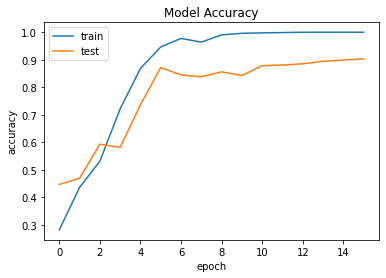

In [20]:
# plot of accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

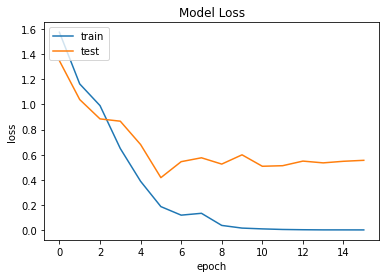

In [21]:
# plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
test_loss, test_acc = model.evaluate(padded_test,  label_test, verbose=2)

print('\nTest accuracy:', test_acc)

14/14 - 17s - loss: 0.5551 - accuracy: 0.9034 - 17s/epoch - 1s/step

Test accuracy: 0.9033707976341248


8. Make predication

- save model

In [22]:
import joblib

joblib.dump(model,"/tmp/modelNLPsub2.pkl")

INFO:tensorflow:Assets written to: ram://73ee6f21-d995-4ff3-acc2-cecddd2c0a04/assets


INFO:tensorflow:Assets written to: ram://73ee6f21-d995-4ff3-acc2-cecddd2c0a04/assets


['/tmp/modelNLPsub2.pkl']

- import saved model

In [1]:
import joblib
model_1 = joblib.load('/content/drive/MyDrive/ML/modelNLPsub2.pkl')

- make prediction

In [25]:
import numpy as np

#define labels
labels = ['business' 	,'entertainment' 	,'politics' 	,'sport' 	,'tech']

sentences = ["Cristiano Ronaldo just score a goal"]
sentences_seq = tokenizer.texts_to_sequences(sentences)
sentences_pad = pad_sequences(sentences_seq) #terapkan argumen lainnya bila ada
prediction = model_1.predict(sentences_pad)

print(prediction)
print( labels[np.argmax(prediction)], np.max(prediction) )

[[0.05340446 0.18511595 0.09589847 0.4041981  0.2613831 ]]
sport 0.4041981


- Sebenarnya secara default, fungsi Tokenizer telah memiliki nilai default argument filters yang sangat lengkap. Sehingga sebenarnya kamu tidak perlu mencantumkannya kembali
Referensi : [Dokumentasi Tokenizer TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)

- Agar lebih menambah insight kamu, berikut beberapa tambahan tutorial yang bisa kamu gunakan dalam membangun model NLP:
  - Pelajari [Text Preprocessing](https://www.kdnuggets.com/2019/04/text-preprocessing-nlp-machine-learning.html) untuk dapat memiliki dataset yang bersih
  - Maksimalkan penggunaan argumen lainnya pada pad_sequences
  - Kamu bisa terapkan penggunaan layer [Bidirectional LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional)
  - Pelajari penggunaan callback function untuk memplot hasil training model dengan [tensorboard](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks#tensorboard_in_notebooks)  
  - Pelajari penggunaan [LearningRateScheduler](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler)
  - Tips mengatasi overfitting/underfitting pada NLP : [video](https://www.youtube.com/watch?v=yxUVu0iN26Q)
  - Pelajari cara tweak learning rate
Pelajari penggunaan pre-trained word embedding [GloVe](https://keras.io/examples/nlp/pretrained_word_embeddings/#load-pretrained-word-embeddings)